Handwritten Alphabet Classifier


The below Segments of code is the effort on building a Neural Network Architecture using Relu and Softmax Acctivation in their inner layers which takes a csv format file as an input and then uses the Neural Architecture to predict the alphabet.
It is a simple project which accurately identifies the the alphabet contained within the image on which it is trained on
Which could potentially help in identifying those scribbled answer sheets and help the school/college faculties to easily evalute ones answersheet


Data Feeding through a CSV File


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\\Downloads\\archive (1)\\A_Z Handwritten Data.csv")

In [3]:
print("Dataset Shape: ", data.shape)
print(data.head())

Dataset Shape:  (372450, 785)
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [4]:
X = data.iloc[:, 1:,].values
y = data.iloc[:, 0].values

In [5]:
print("Features shape: ", X.shape)
print("Labels shape: ", y.shape)


Features shape:  (372450, 784)
Labels shape:  (372450,)


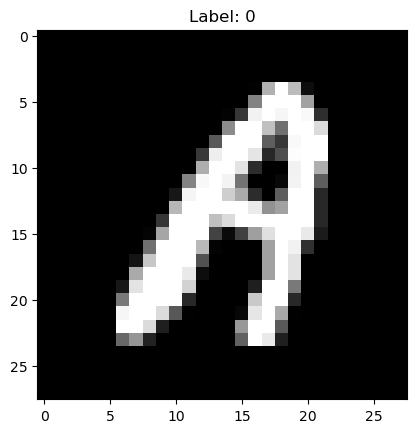

In [6]:
sample = X[0].reshape(28, 28)
plt.imshow(sample, cmap='gray')
plt.title("Label: "+str(y[0]))
plt.show()

Data Preprocessing using scikit learn and tensorflow


In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y, num_classes=26)



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print("Training dataset: ", X_train)
print("Testing dataset: ", X_test)

Training dataset:  [[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0

Building a CNN Network Sequentially Layer by Layer


In [11]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

Testing the built Neural Network by Evaluating Models's accuracy


In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128
    
)

Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 113s 47ms/step - accuracy: 0.9094 - loss: 0.3177 - val_accuracy: 0.9795 - val_loss: 0.0757
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 97s 41ms/step - accuracy: 0.9624 - loss: 0.1345 - val_accuracy: 0.9844 - val_loss: 0.0595
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 115s 49ms/step - accuracy: 0.9707 - loss: 0.1055 - val_accuracy: 0.9869 - val_loss: 0.0499
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 72s 31ms/step - accuracy: 0.9755 - loss: 0.0871 - val_accuracy: 0.9876 - val_loss: 0.0465
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 73s 31ms/step - accuracy: 0.9794 - loss: 0.0735 - val_accuracy: 0.9894 - val_loss: 0.0412
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 73s 31ms/step - accuracy: 0.9808 - loss: 0.0671 - val_accuracy: 0.9894 - val_loss: 0.0406
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 74s 32ms/step - accuracy: 0.9828 - loss: 0.0588 - val_accuracy: 0.9896 - val_loss: 0.0402
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.9840

Model is 98.6% accurate with a cross validation accuracy of 99% in identifying the english alphabets


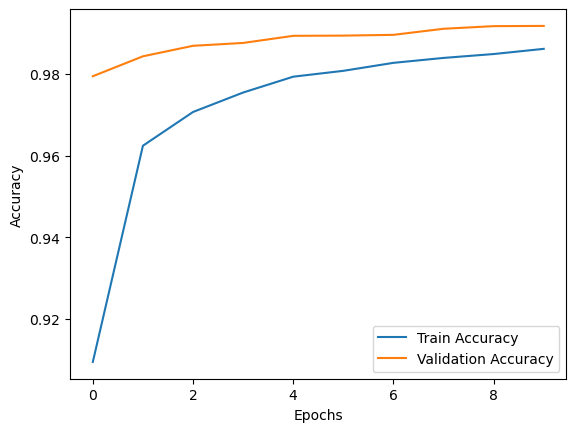

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Saved My Model for the future purpose so that we can use it to test the images of alphabets provided by others


In [15]:
model.save('my_model_kushagraDwivedi.keras')

Testing for the images of alphabets provided by others for real-time evaluation metrices


In [16]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import string
from tensorflow.keras.models import load_model

The given option below is for uploading an image and then recognizing the alphabet


In [17]:
letters = dict(enumerate(string.ascii_uppercase))

# Load your trained model
model = load_model("my_model_kushagraDwivedi.keras")

def preprocess_image(img_path):
    # Load in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize to 28x28
    img = cv2.resize(img, (28,28))
    
    # Invert colors if background is white
    if np.mean(img) > 127:  
        img = 255 - img
    
    # Normalize
    img = img / 255.0
    
    # Reshape for model
    img = img.reshape(1,28,28,1)
    
    return img

def predict(img_path):
    img = preprocess_image(img_path)
    pred = model.predict(img)
    predicted_class = np.argmax(pred)
    return letters[predicted_class]

# -----------------------------
# Example usage
# -----------------------------
path = "C:\\Users\\kusha\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-09-14 132136.png"  # replace with your test image path
print("Your Alphabet in the image contains:", predict(path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Your Alphabet in the image contains: K
